# 🚀 Projet TortillaPredict !

**Ce projet aura pour objectif d'étudier d'étudier des données relatives aux prix de vente de tortillas, au mexique, en fonction de différentes caractéristiques.**

Nous procéderons dans un premier temps à une analyse des données afin de mieux les appréhender, puis nous tenterons d'établir un modèle de prédiction permettant de prédire le prix auquel sera vendue une tortilla en fonction de ses caractéristiques.

In [2]:
#Chargement des librairies nécessaires pour le traitement des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Chargement des données
tortilla_datas = pd.read_csv('tortilla_prices.csv')

In [4]:
#Commençons par observer les premières lignes de notre jeu de données
print(tortilla_datas.head(20))

                  State              City  Year  Month  Day  \
0        Aguascalientes    Aguascalientes  2007      1   10   
1       Baja California          Mexicali  2007      1   10   
2       Baja California           Tijuana  2007      1   10   
3   Baja California Sur            La Paz  2007      1   10   
4              Campeche          Campeche  2007      1   10   
5              Coahuila    Piedras Negras  2007      1   10   
6              Coahuila          Saltillo  2007      1   10   
7                Colima            Colima  2007      1   10   
8               Chiapas         Tapachula  2007      1   10   
9               Chiapas  Tuxtla Gutiérrez  2007      1   10   
10            Chihuahua         Chihuahua  2007      1   10   
11            Chihuahua        Cd. Juárez  2007      1   10   
12                 D.F.              D.F.  2007      1   10   
13                 D.F.           ZM D.F.  2007      1   10   
14              Durango           Durango  2007      1 

TODO: Observation sur la premère impression des données

In [5]:
#Chopons les premières infos sur notre jeu de données

print(tortilla_datas.info())
print("-------------------------------------------------------------------------------------------------------\n")
print(tortilla_datas.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278886 entries, 0 to 278885
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               278886 non-null  object 
 1   City                278886 non-null  object 
 2   Year                278886 non-null  int64  
 3   Month               278886 non-null  int64  
 4   Day                 278886 non-null  int64  
 5   Store type          278886 non-null  object 
 6   Price per kilogram  272496 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 14.9+ MB
None
-------------------------------------------------------------------------------------------------------

                Year          Month            Day  Price per kilogram
count  278886.000000  278886.000000  278886.000000       272496.000000
mean     2015.080015       6.384781      15.951955           12.054586
std         4.912392       3.440216       8.755248    

In [6]:
#On va verifier la qualité du dataset
#Y a t il des valeurs manquantes?

nan_values = tortilla_datas.isna().sum()

print(nan_values)

State                    0
City                     0
Year                     0
Month                    0
Day                      0
Store type               0
Price per kilogram    6390
dtype: int64


On constate que dans la colonne des prix au kg on a pas mal de valeur nulles, pour poursuivre l'analyse, on va virer les valeurs manquantes.

In [7]:
clean_tortilla_datas = tortilla_datas.dropna()

print(clean_tortilla_datas.info())

print("\n--------------------------------------------------------------------------------------------------------\n")

print(clean_tortilla_datas.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 272496 entries, 0 to 278885
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               272496 non-null  object 
 1   City                272496 non-null  object 
 2   Year                272496 non-null  int64  
 3   Month               272496 non-null  int64  
 4   Day                 272496 non-null  int64  
 5   Store type          272496 non-null  object 
 6   Price per kilogram  272496 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 16.6+ MB
None

--------------------------------------------------------------------------------------------------------

State                 0
City                  0
Year                  0
Month                 0
Day                   0
Store type            0
Price per kilogram    0
dtype: int64


Au delà des valeurs manquantes on peut potentiellement retrouver des doublons, continuons le nettoyage pour vérifier

In [8]:
cleaned_tortilla_datas = clean_tortilla_datas.drop_duplicates()

print(cleaned_tortilla_datas.info())

<class 'pandas.core.frame.DataFrame'>
Index: 272496 entries, 0 to 278885
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               272496 non-null  object 
 1   City                272496 non-null  object 
 2   Year                272496 non-null  int64  
 3   Month               272496 non-null  int64  
 4   Day                 272496 non-null  int64  
 5   Store type          272496 non-null  object 
 6   Price per kilogram  272496 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 16.6+ MB
None


Partons du principe que le nettoyage préliminaire est terminé et se poursuivra si par la suite nous remarquons des soucis

Passons a la visualisation !

On va faire différentes visualisations pour observer les tendances evolutives des prix.

In [11]:
data_price_per_city = cleaned_tortilla_datas.groupby('City')['Price per kilogram'].mean()

print(data_price_per_city, data_price_per_city.shape)

City
Acapulco                 13.035073
Aguascalientes           11.142914
Campeche                 12.385591
Cancún                   12.757416
Cd. Juárez               11.589896
Cd. Obregón              12.953723
Cd. Victoria             12.332803
Celaya                   13.787007
Chetumal                 12.627133
Chihuahua                13.362318
Chilpancingo             12.179903
Coatzacoalcos            11.870538
Colima                   12.390900
Cuernavaca               12.749273
Culiacán                 12.633569
D.F.                     10.985537
Durango                  10.923680
Guadalajara              11.405508
Gómez Palacio            12.792396
Hermosillo               14.200922
Irapuato                  9.373015
La Paz                   12.809370
León                     11.248632
Matamoros                13.249640
Mexicali                 14.048310
Monterrey                12.344870
Morelia                  11.384063
Mérida                   12.842550
Nogales        

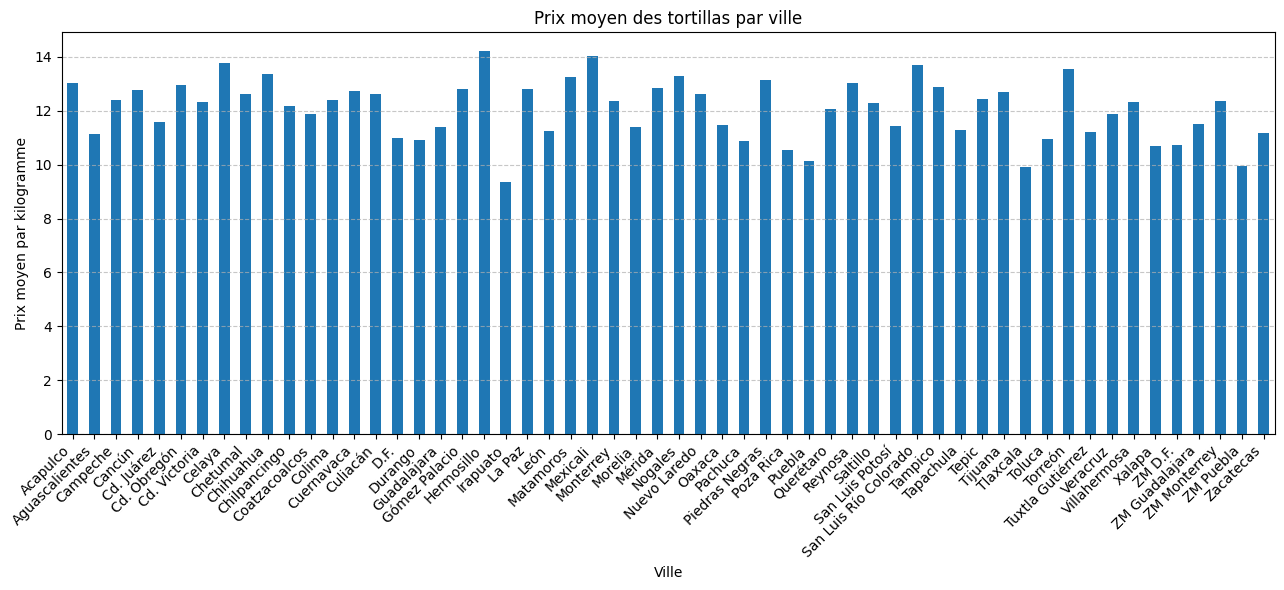

In [17]:
plt.figure(figsize=(13, 6))
data_price_per_city.plot(kind='bar')
plt.title('Prix moyen des tortillas par ville')
plt.xlabel('Ville')
plt.ylabel('Prix moyen par kilogramme')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [19]:
data_price_per_state = cleaned_tortilla_datas.groupby('State')['Price per kilogram'].mean()

print(data_price_per_state, data_price_per_state.shape)

State
Aguascalientes         11.142914
Baja California        13.367229
Baja California Sur    12.809370
Campeche               12.385591
Chiapas                11.253079
Chihuahua              12.477849
Coahuila               12.928882
Colima                 12.390900
D.F.                   10.865681
Durango                11.782022
Edo. México            10.941882
Guanajuato             11.447729
Guerrero               12.608414
Hidalgo                10.889230
Jalisco                11.466370
Michoacán              11.384063
Morelos                12.749273
Nayarit                12.444586
Nuevo León             12.356659
Oaxaca                 11.459959
Puebla                 10.047530
Querétaro              12.047448
Quintana Roo           12.692596
San Luis Potosí        11.422022
Sinaloa                12.633569
Sonora                 13.504149
Tabasco                12.325352
Tamaulipas             12.818801
Tlaxcala                9.895804
Veracruz               11.338861
Yuca

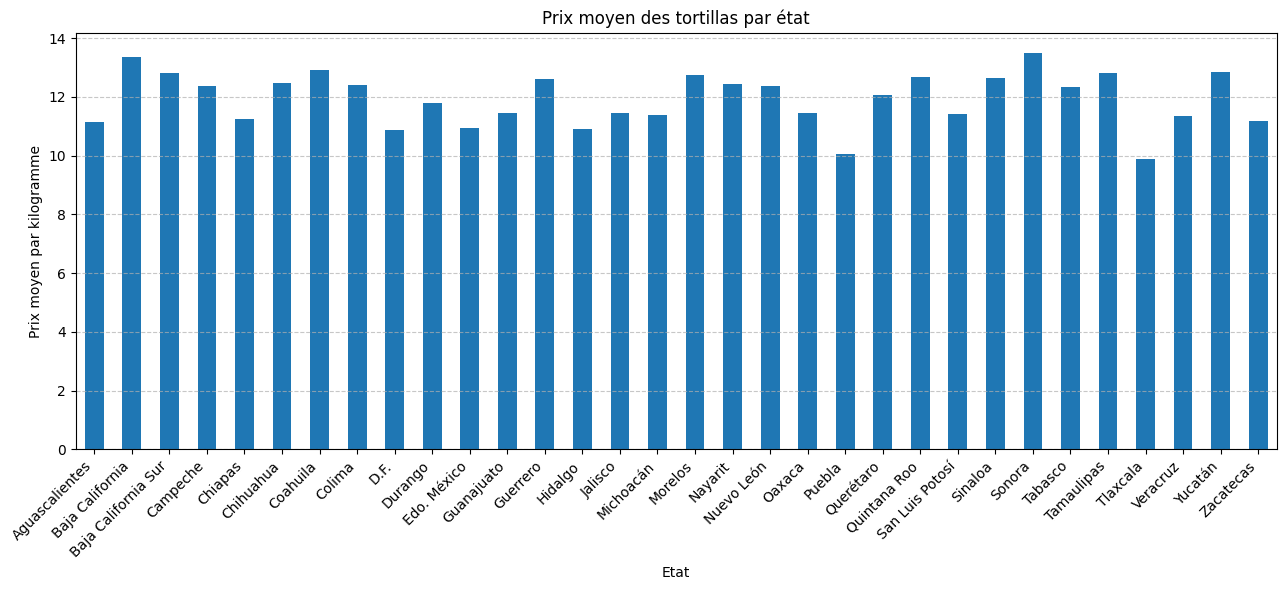

In [20]:
plt.figure(figsize=(13, 6))
data_price_per_state.plot(kind='bar')
plt.title('Prix moyen des tortillas par état')
plt.xlabel('Etat')
plt.ylabel('Prix moyen par kilogramme')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

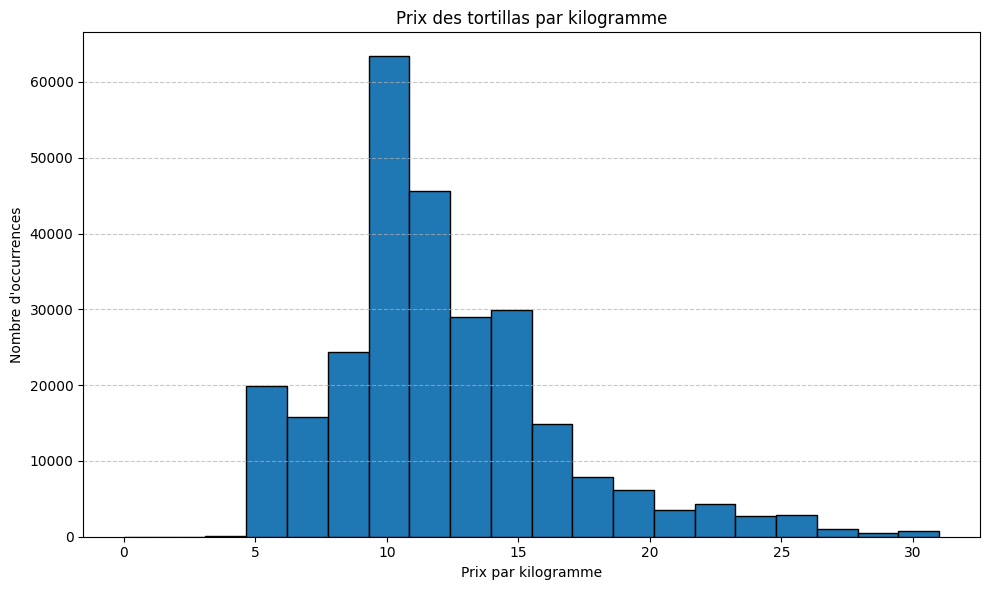

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(clean_tortilla_datas['Price per kilogram'], bins=20, edgecolor='black')
plt.title('Prix des tortillas par kilogramme')
plt.xlabel('Prix par kilogramme')
plt.ylabel('Nombre d\'occurrences')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

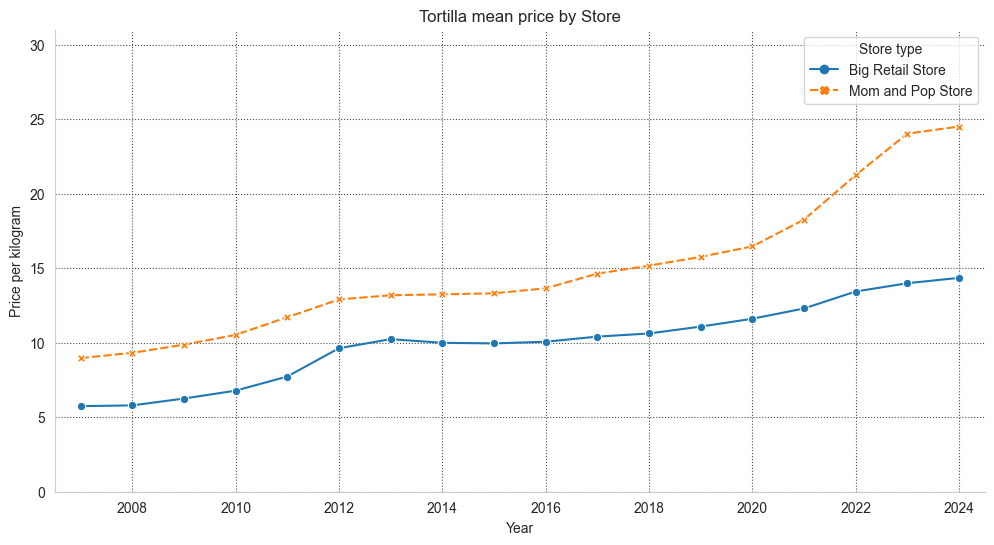

In [34]:

price_by_store_and_year = clean_tortilla_datas.groupby(['Store type', 'Year'])['Price per kilogram'].mean().to_frame().reset_index()


plt.figure(figsize=(12, 6))
sns.set_style("whitegrid", {"grid.color": ".3", "grid.linestyle": ":"})
g = sns.lineplot(data = price_by_store_and_year, x = 'Year',
                 y = 'Price per kilogram', hue = 'Store type', style = 'Store type',
                 markers=True)
g.set_xlim(2006.5, 2024.5)
g.set_ylim(0, 31)
g.set(title="Tortilla mean price by Store", ylabel="Price per kilogram")
sns.despine()

TODO: Le model de regression linéaire pour prédire le prix des tortillas et quelques commentaires sur les visualisations